In [2]:
import cv2,os

data_path='DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [3]:
data_path='DATASET/train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [4]:
data_path='DATASET'

In [5]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [6]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [7]:
import numpy as np

In [8]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

DATASET\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\test\0
DATASET\test\A
DATASET\test\B
DATASET\test\C
DATASET\test\D
DATASET\test\E
DATASET\test\F
DATASET\test\G
DATASET\test\H
DATASET\test\I
DATASET\test\J
DATASET\test\K
DATASET\test\L
DATASET\test\M
DATASET\test\N
DATASET\test\O
DATASET\test\P
DATASET\test\Q
DATASET\test\R
DATASET\test\S
DATASET\test\T
DATASET\test\U
DATASET\test\V
DATASET\test\W
DATASET\test\X
DATASET\test\Y
DATASET\test\Z
DATASET\train
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\train\0
DATASET\train\A
DATASET\train\B
DATASET\train\C
DATASET\train\D
DATASET\train\E
DATASET\train\F
DATASET\train\G
DATASET\train\H
DATASET\train\I
DATASET\train\J
DATASET\train\K
DATASET\train\L
DATASET\train\M
DATASET\train\N
DATASET\train\O
DATASET\train\P
DATASET\train\Q
DATASET\

In [9]:
datanp=np.array(data)

In [10]:
datanp.shape

(17113, 128, 128)

In [11]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [12]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [13]:
new_target.shape

(17113, 27)

In [14]:
np.save('data_img',data)
np.save('target',new_target)

In [15]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [18]:
from keras.callbacks import ModelCheckpoint

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 2.2493 - accuracy: 0.3166

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


300/300 [==============================] - 93s 303ms/step - loss: 2.2493 - accuracy: 0.3166 - val_loss: 0.5398 - val_accuracy: 0.9070
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.7674

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


300/300 [==============================] - 77s 257ms/step - loss: 0.7092 - accuracy: 0.7674 - val_loss: 0.0754 - val_accuracy: 0.9861
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.3999 - accuracy: 0.8647

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


300/300 [==============================] - 86s 288ms/step - loss: 0.3999 - accuracy: 0.8647 - val_loss: 0.0425 - val_accuracy: 0.9946
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.9048

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


300/300 [==============================] - 94s 315ms/step - loss: 0.2812 - accuracy: 0.9048 - val_loss: 0.0164 - val_accuracy: 0.9963
Epoch 5/20
300/300 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9226

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


300/300 [==============================] - 92s 305ms/step - loss: 0.2292 - accuracy: 0.9226 - val_loss: 0.0101 - val_accuracy: 0.9973
Epoch 6/20
300/300 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9323

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


300/300 [==============================] - 93s 309ms/step - loss: 0.2007 - accuracy: 0.9323 - val_loss: 0.0072 - val_accuracy: 0.9990
Epoch 7/20
300/300 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9466

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


300/300 [==============================] - 106s 352ms/step - loss: 0.1654 - accuracy: 0.9466 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 8/20
300/300 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9503

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


300/300 [==============================] - 91s 303ms/step - loss: 0.1542 - accuracy: 0.9503 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 9/20
300/300 [==============================] - 82s 274ms/step - loss: 0.1262 - accuracy: 0.9563 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 10/20
300/300 [==============================] - ETA: 0s - loss: 0.1120 - accuracy: 0.9618

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


300/300 [==============================] - 84s 281ms/step - loss: 0.1120 - accuracy: 0.9618 - val_loss: 0.0045 - val_accuracy: 0.9988
Epoch 11/20
300/300 [==============================] - ETA: 0s - loss: 0.1246 - accuracy: 0.9590

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


300/300 [==============================] - 80s 268ms/step - loss: 0.1246 - accuracy: 0.9590 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 12/20
300/300 [==============================] - 76s 254ms/step - loss: 0.1164 - accuracy: 0.9608 - val_loss: 0.0044 - val_accuracy: 0.9988
Epoch 13/20
300/300 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9677

INFO:tensorflow:Assets written to: model-013.model\assets


INFO:tensorflow:Assets written to: model-013.model\assets


300/300 [==============================] - 77s 258ms/step - loss: 0.1021 - accuracy: 0.9677 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 14/20
300/300 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9693

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


300/300 [==============================] - 79s 264ms/step - loss: 0.0947 - accuracy: 0.9693 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 15/20
300/300 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9695

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


300/300 [==============================] - 80s 267ms/step - loss: 0.0946 - accuracy: 0.9695 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 16/20
300/300 [==============================] - 79s 264ms/step - loss: 0.0895 - accuracy: 0.9715 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 17/20
300/300 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9760

INFO:tensorflow:Assets written to: model-017.model\assets


INFO:tensorflow:Assets written to: model-017.model\assets


300/300 [==============================] - 83s 276ms/step - loss: 0.0759 - accuracy: 0.9760 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 18/20
300/300 [==============================] - 79s 263ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.0020 - val_accuracy: 0.9990
Epoch 19/20
300/300 [==============================] - 82s 274ms/step - loss: 0.0618 - accuracy: 0.9791 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 20/20
300/300 [==============================] - 98s 326ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0029 - val_accuracy: 0.9995


In [20]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 9s 86ms/step - loss: 0.0023 - accuracy: 0.9997
[0.002290189964696765, 0.9997078776359558]


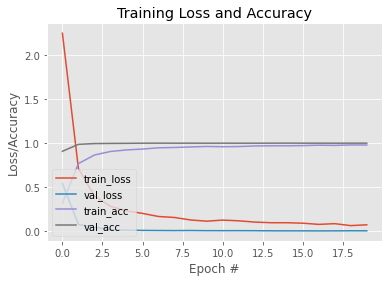

In [23]:
import matplotlib.pyplot as plt
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [24]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('asl_classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


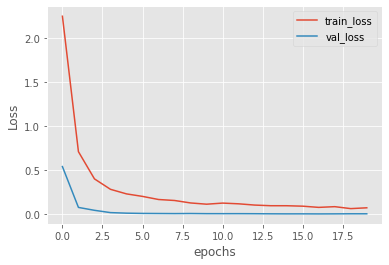

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

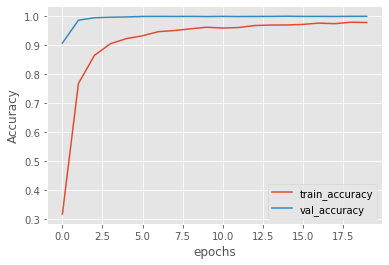

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()